# Producto escalar.

**Objetivo.**
Revisar e ilustrar las propiedades del producto escalar $\mathbb{R}^n$, para $n>=2$ usando la biblioteca `numpy`.


 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/intro_MeIA_2023">Espacios_vectoriales_1.ipynb</a> by <span property="cc:attributionName">Luis Miguel de la Cruz Salas</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

In [1]:
# Importamos las bibliotecas requeridas
import numpy as np
import macti.visual as mvis

## Definición y propiedades.
Producto escalar es una operación algebraica que toma dos vectores y retorna un escalar. También se conoce como producto interno o producto punto. Su definición matemática es la siguiente:

$$
\langle \vec{x}, \vec{y} \rangle = \vec{y}^T \cdot \vec{x} = \sum_{i=1}^n x_i y_i \tag{1}
$$

**Propiedades**:
1. $\langle \vec{x}, \vec{y} \rangle = 0$ si y solo si $\vec{x}$ y $\vec{y}$ son ortogonales.
2. $\langle \vec{x}, \vec{x} \rangle \ge 0$, además $\langle \vec{x}, \vec{x} \rangle = 0$ si y solo si $\vec{x} = 0$
3. $\langle \alpha \vec{x}, \vec{y} \rangle = \alpha \langle \vec{x}, \vec{y} \rangle$
4. $\langle \vec{x}+\vec{y}, \vec{z} \rangle = \langle \vec{x}, \vec{z} \rangle + \langle \vec{y}, \vec{z} \rangle$
5. $\langle \vec{x}, \vec{y} \rangle = \langle \vec{y}, \vec{x} \rangle $
6. Desigualdad de Schwarz : $||\langle \vec{x}, \vec{y} \rangle|| \le ||\vec{x}|| ||\vec{y}||$

En lo que sigue realizaremos ejemplos en $\mathbb{R}^2$ de las propiedades antes descritas usando vectores (arreglos) construidos con la biblioteca `numpy`.

In [2]:
# Definimos dos vectores en R^2 usando numpy
x = np.array([2, 3]) 
y = np.array([3, 1])

# Imprimimos los vectores
print('x = {}'.format(x))
print('y = {}'.format(y))

x = [2 3]
y = [3 1]


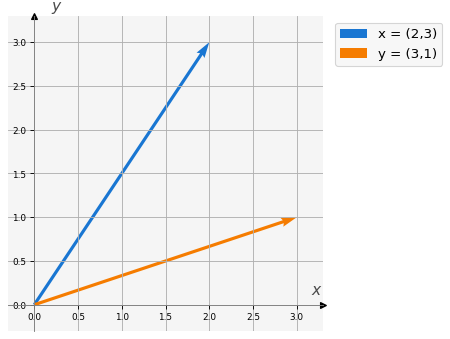

In [3]:
# Visualizamos los vectores.
v = mvis.Plotter()  # Definición de un objeto para crear figuras.
v.set_coordsys(1)   # Definición del sistema de coordenadas.
v.plot_vectors(1, [x, y], ['x = (2,3)', 'y = (3,1)'], ofx=-0.1) # Graficación de los vectores 'x' y 'y'.
v.grid()  # Muestra la rejilla del sistema de coordenadas.

## Implementación.
En Python es posible implementar el producto escalar de varias maneras, a continuación presentamos algunas de ellas.

### Usando el ciclo `for`.
Es posible hacer una implementación del producto escalar usando ciclos `for`. De acuerdo con la definición $\langle \vec{x}, \vec{y} \rangle = \sum_{i=1}^n x_i y_i$  una implementación es como sigue:

In [4]:
dot_prod = 0.0

for i in range(len(x)):
    dot_prod += x[i] * y[i]
    
print('for cycle →  <x, y> = {:0.2f}'.format(dot_prod))

for cycle →  <x, y> = 9.00


### Usando la función [`numpy.dot()`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html).
Esta función implementa un producto generalizado entre matrices cuyos elementos pueden ser flotantes o números complejos. Cuando se usa con arreglos de flotantes se obtiene el producto escalar. Usando esta función el ejemplo anterior se implementa cómo sigue:

In [5]:
dot_prod = np.dot(x,y)
print('np.dot → <x, y> = {:0.2f}'.format(dot_prod))

np.dot → <x, y> = 9.00


### Usando la función [`np.inner()`](https://numpy.org/doc/stable/reference/generated/numpy.inner.html).
Esta función implementa el producto interno entre dos arreglos.
Usando esta función el ejemplo anterior se implementa cómo sigue:


In [6]:
dot_prod = np.inner(x,y)
print('np.inner → <x, y> = {:0.2f}'.format(dot_prod))

np.inner → <x, y> = 9.00


### Usando el operador `@` .
El operador `@`, disponible desde la versión Python 3.5, se puede usar para realizar la multiplicación de matrices convencional. Cuando se usa con arreglos de 1D se obtiene el producto escalar.

In [7]:
dot_prod = x @ y
print('Operador @ → <x, y> = {:0.2f}'.format(dot_prod))

Operador @ → <x, y> = 9.00


Lo conveniente es usar el operador `@` o alguna de las funciones de biblioteca que ya están implementadas, como `dot()` o `inner()`  y evitar la implementación usando el ciclo `for`. La razón es que la biblioteca 
[Linear algebra](https://numpy.org/doc/stable/reference/routines.linalg.html#module-numpy.linalg), cuando es posible utiliza la biblioteca [BLAS](https://www.netlib.org/blas/) optimizada.

En lo que sigue usaremos el operador `@` para calcular el producto escalar y probar las propiedades descritas al principio.

## Propiedad 1: Ortogonalidad.

In [8]:
# Definimos otro vector en R^2
z = np.array([-3, 2])

In [10]:
# Calculamos el producto escalar entre los vectores x, y, z
print('<x, y> = {:>5.2f}'.format(x @ y))
print('<x, z> = {:>5.2f}'.format(x @ z))
print('<z, y> = {:>5.2f}'.format(z @ y))

<x, y> =  9.00
<x, z> =  0.00
<z, y> = -7.00


Como se puede observar, solo el producto $\langle \vec{x}, \vec{z} \rangle = 0$, lo cual significa que son ortogonales. Veamos los vectores gráficamente:

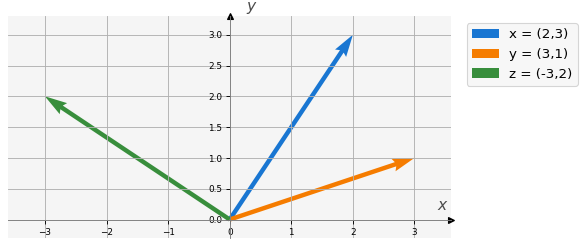

In [11]:
v = mvis.Plotter()  # Definición de un objeto para crear figuras.
v.set_coordsys(1)   # Definición del sistema de coordenadas.
v.plot_vectors(1, [x, y, z], ['x = (2,3)', 'y = (3,1)', 'z = (-3,2)'],ofx=-0.2) # Graficación de los vectores 'x' y 'y'.
v.grid()  # Muestra la rejilla del sistema de coordenadas.

<div class="alert alert-info" role="alert">
La función <b>calc_angle(a, b)</b>, definida en la siguiente celda, calcula el ángulo entre los vectores $\vec{a}$ y $\vec{b}$ utilizando la siguiente fórmula

$$
\cos(\alpha)  = \langle \vec{a}, \vec{b} \rangle / ||\vec{a}|| || \vec{b}||
\Longrightarrow \alpha = \arccos \left(\langle \vec{a}, \vec{b} \rangle / ||\vec{a}|| || \vec{b}|| \right)
$$

Se usan las funciones `np.linalg.norm()` que calcula la norma de un vector, `np.arccos()` que es la función inversa del coseno y la constante `np.pi` que proporciona el valor de $\pi$.
</div>

In [12]:
def calc_angle(a, b):
    return np.arccos(a @ b / (np.linalg.norm(a) * np.linalg.norm(b))) * 180 / np.pi

In [13]:
# Calculamos el ángulo entre los vectores x, y, z
print('Ángulo entre x y y : {}'.format(calc_angle(x, y)))
print('Ángulo entre x y z : {}'.format(calc_angle(x, z)))
print('Ángulo entre z y y : {}'.format(calc_angle(z, y)))

Ángulo entre x y y : 37.874983651098205
Ángulo entre x y z : 90.0
Ángulo entre z y y : 127.87498365109819


Observamos que efectivamente el ángulo entre $\vec{x}$ y $\vec{z}$ es de $90^o$.

## Propiedad 2. $\langle \vec{x}, \vec{x} \rangle \ge 0$

Verficamos que se cumple para los vectores $\vec{x}$, $\vec{y}$ y $\vec{z}$:

In [14]:
print('<x, x> = {:>5.2f}'.format(x @ x))
print('<y, y> = {:>5.2f}'.format(y @ y))
print('<z, z> = {:>5.2f}'.format(z @ z))

<x, x> = 13.00
<y, y> = 10.00
<z, z> = 13.00


## Propiedad 3. Multiplicación por un escalar.

$\langle \alpha \vec{x}, \vec{y} \rangle = \alpha \langle \vec{x}, \vec{y} \rangle$

In [15]:
# Definimos un escalar
α = 1.5

print('<α * x, y> = {}'.format((α * x) @ y))
print('α * <x, y> = {}'.format(α * x @ y))
print(' ¿ <α * x, y> == α * <x,y> ? : {}'.format(np.isclose((α * x) @ y, α * x @ y)))

<α * x, y> = 13.5
α * <x, y> = 13.5
 ¿ <α * x, y> == α * <x,y> ? : True


## Propiedad 4. Asociatividad.

$\langle \vec{x}+\vec{y}, \vec{z} \rangle = \langle \vec{x}, \vec{z} \rangle + \langle \vec{y}, \vec{z} \rangle$

In [16]:
print('     <x + y, z> = {}'.format((x + y) @ z))
print('<x, z> + <y, z> = {}'.format(x @ z + y @ z))
print(' ¿ <x + y, z> == <x, z> + <y, z>? : {}'.format(np.isclose((x + y) @ z, x @ z + y @ z)))

     <x + y, z> = -7
<x, z> + <y, z> = -7
 ¿ <x + y, z> == <x, z> + <y, z>? : True


## Propiedad 5. Conmutatividad.

$\langle \vec{x}, \vec{y} \rangle = \langle \vec{y}, \vec{x} \rangle $

In [17]:
print('<x, y> = {}'.format(x @ y))
print('<y, x> = {}'.format(y @ x))
print(' ¿ <x, y> == <y, x> ? : {}'.format(np.isclose(x @ y, y @ x)))

<x, y> = 9
<y, x> = 9
 ¿ <x, y> == <y, x> ? : True


## Propiedad 6. Desigualdad de Schwarz. 

$||\langle \vec{x}, \vec{y} \rangle|| \le ||\vec{x}|| ||\vec{y}||$

In [51]:
print('||<x, y>|| = {}'.format(np.abs(z @ y)))
print('||x|| ||y||= {}'.format(np.linalg.norm(z) * np.linalg.norm(y)))
print('¿||<x, y>|| ≤ ||x|| ||y||? : {}'.format( np.abs(z @ y) <= np.linalg.norm(z) * np.linalg.norm(y)))

||<x, y>|| = 3.8
||x|| ||y||= 6.1773780845922
¿||<x, y>|| ≤ ||x|| ||y||? : True


## **Ejercicio 1.**

---
<font color="MediumBlue"> Definimos los siguientes vectores $\vec{x} = (3.5, 0, -3.5, 0)$, $\vec{y} = (1.5, 1.0, 2.3, -1.0)$ y $\vec{z} = (1.0, 1.0, 1.0, 1.0)$ en $\mathbb{R}^4$ y $\alpha = 0.5$ un escalar. Verifica que se cumplen las propiedades 1 a 6.
<br><br>
<b>Hint</b>. Define los vectores $\vec{x}$, $\vec{y}$ y $\vec{z}$ usando `numpy` y posteriormente copia los códigos utilizados en el ejemplo de $\mathbb{R}^2$ para cada propiedad.<br><br>
<b>Obervación</b>. En este caso no es posible realizar gráficas.
</font>

---

**Definición de los vectores.**

Deberías obtener un resultado como el siguiente al imprimir los tres vectores:

---
```
x = [ 3.5  0.  -3.5  0. ]
y = [ 1.5  1.   2.3 -1. ]
z = [1. 1. 1. 1.]
```
---

In [34]:
### Definición de los vectores en R^4 con numpy
### BEGIN SOLUTION
x = np.array([3.5, 0, -3.5, 0])
y = np.array([1.5, 1.0, 2.3, -1.0])
z = np.array([1.0, 1.0, 1.0, 1.0])

print('x = {}'.format(x))
print('y = {}'.format(y))
print('z = {}'.format(z))
### END SOLUTION

x = [ 3.5  0.  -3.5  0. ]
y = [ 1.5  1.   2.3 -1. ]
z = [1. 1. 1. 1.]


**Propiedad 1.**

El resultado debería ser:

---
```
<x, y> = -2.80
<x, z> =  0.00
<z, y> =  3.80
```
---

In [44]:
# Calculamos el producto escalar entre los vectores x, y, z
### BEGIN SOLUTION
print('<x, y> = {:>5.2f}'.format(x @ y))
print('<x, z> = {:>5.2f}'.format(x @ z))
print('<z, y> = {:>5.2f}'.format(z @ y))
### END SOLUTION

<x, y> = -2.80
<x, z> =  0.00
<z, y> =  3.80


**Propiedad 2.**

El resultado debería ser:

---
```
<x, x> = 24.50
<y, y> =  9.54
<z, z> =  4.00
```
---

In [45]:
### BEGIN SOLUTION
print('<x, x> = {:>5.2f}'.format(x @ x))
print('<y, y> = {:>5.2f}'.format(y @ y))
print('<z, z> = {:>5.2f}'.format(z @ z))
### END SOLUTION

<x, x> = 24.50
<y, y> =  9.54
<z, z> =  4.00


**Propiedad 3.**

El resultado debería ser:

---
```
<α * x, y> = -1.3999999999999997
α * <x, y> = -1.3999999999999997
 ¿ <α * x, y> == α * <x,y> ? : True
```
---

In [46]:
# Definimos un escalar
### BEGIN SOLUTION
α = 0.5

print('<α * x, y> = {}'.format((α * x) @ y))
print('α * <x, y> = {}'.format(α * x @ y))
print(' ¿ <α * x, y> == α * <x,y> ? : {}'.format(np.isclose((α * x) @ y, α * x @ y)))
### END SOLUTION

<α * x, y> = -1.3999999999999997
α * <x, y> = -1.3999999999999997
 ¿ <α * x, y> == α * <x,y> ? : True


**Propiedad 4.**

El resultado debería ser:

---
```
     <x + y, z> = 3.8
<x, z> + <y, z> = 3.8
 ¿ <x + y, z> == <x, z> + <y, z>? : True
```
-----

In [48]:
### BEGIN SOLUTION
print('     <x + y, z> = {}'.format((x + y) @ z))
print('<x, z> + <y, z> = {}'.format(x @ z + y @ z))
print(' ¿ <x + y, z> == <x, z> + <y, z>? : {}'.format(np.isclose((x + y) @ z, x @ z + y @ z)))
### END SOLUTION

     <x + y, z> = 3.8
<x, z> + <y, z> = 3.8
 ¿ <x + y, z> == <x, z> + <y, z>? : True


**Propiedad 5.**

El resultado debería ser:

---
```
<x, y> = -2.7999999999999994
<y, x> = -2.7999999999999994
 ¿ <x, y> == <y, x> ? : True
```
-----

In [50]:
### BEGIN SOLUTION
print('<x, y> = {}'.format(x @ y))
print('<y, x> = {}'.format(y @ x))
print(' ¿ <x, y> == <y, x> ? : {}'.format(np.isclose(x @ y, y @ x)))
### END SOLUTION

<x, y> = -2.7999999999999994
<y, x> = -2.7999999999999994
 ¿ <x, y> == <y, x> ? : True


**Propiedad 6.**

El resultado debería ser:

---
```
||<x, y>|| = 3.8
||x|| ||y||= 6.1773780845922
¿||<x, y>|| ≤ ||x|| ||y|? : True
```

----

In [53]:
### BEGIN SOLUTION
print('||<x, y>|| = {}'.format(np.abs(z @ y)))
print('||x|| ||y||= {}'.format(np.linalg.norm(z) * np.linalg.norm(y)))
print('¿||<x, y>|| ≤ ||x|| ||y||? : {}'.format( np.abs(z @ y) <= np.linalg.norm(z) * np.linalg.norm(y)))
### END SOLUTION

||<x, y>|| = 3.8
||x|| ||y||= 6.1773780845922
¿||<x, y>|| ≤ ||x|| ||y||? : True
